# Tarea #1 Inteligencia Artificial: Implementación de Regresión Lineal Manual con Descenso de Gradiente.
## Profesor:
- Steven Andrey Pacheco Portuguez

## Estudiantes:
- Javier Alonso Rojas Rojas
- Dario Espinoza
- Emmanuel Sanchez


## Lectura del dataset

In [27]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df = pandas.read_csv('Student_Performance.csv')
# Ver las filas y columnas del DataFrame
print(df.shape)

# Ver las columnas y tipos de datos del DataFrame
print(df.info())

# Ver características estadísticas descriptivas básicas del DataFrame
print(df.describe())
print(df.describe(include='all'))

# Valores duplicados
print(f"Duplicados: {df.duplicated().sum() | 0}")
# Valores nulos
print(f"Nulos:\n {df.isna().sum() | 0}")
df

(10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


## Tratamiento de duplicados

In [17]:
df = df.drop_duplicates()

# Confirmar que se borraron
print(f"Duplicados: {df.duplicated().sum()}")  
print(f"Forma: {df.shape}")               


Duplicados: 0
Forma: (9873, 6)


## Histogramas

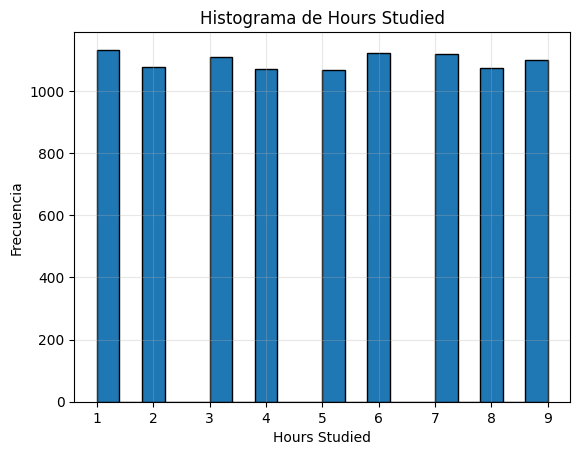

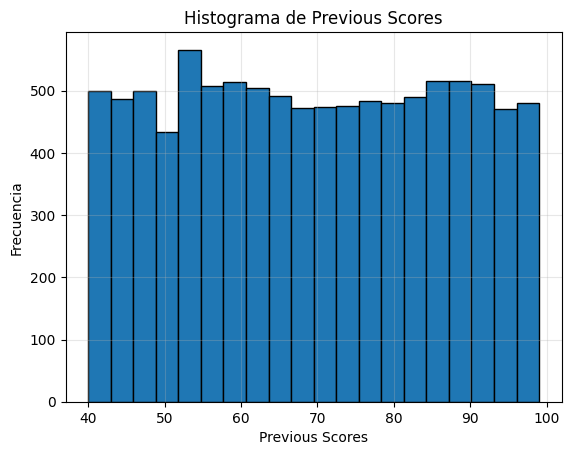

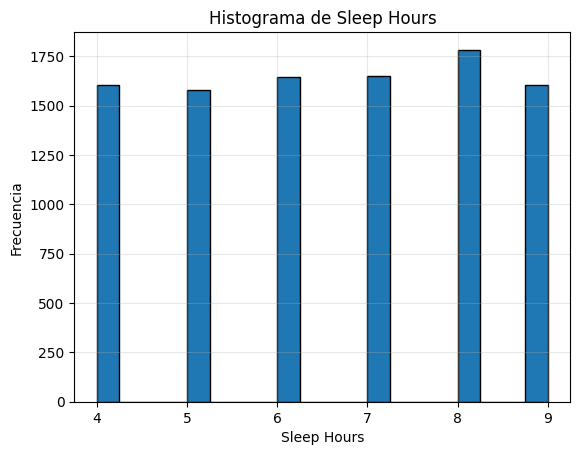

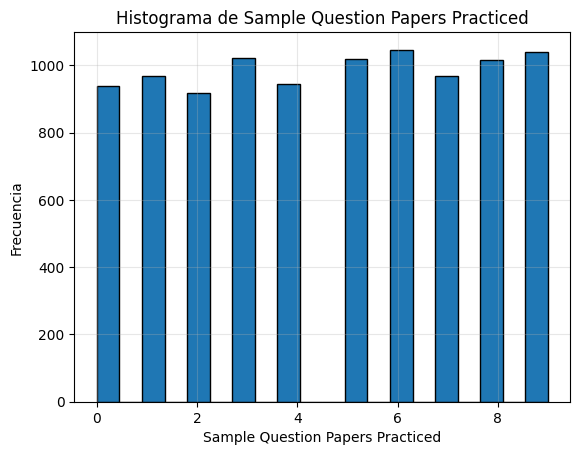

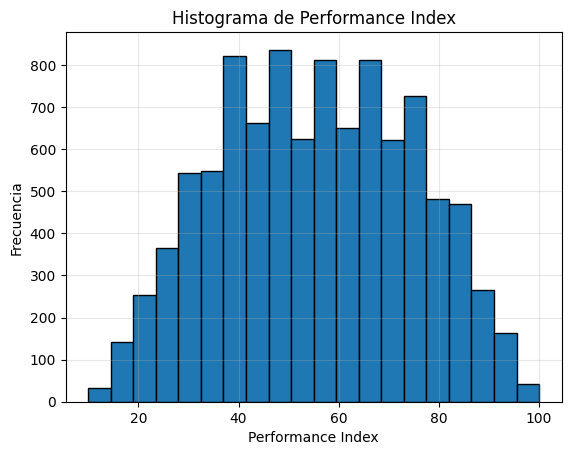

In [5]:
num_vars = ["Hours Studied", "Previous Scores", "Sleep Hours",
            "Sample Question Papers Practiced", "Performance Index"]
for col in num_vars:
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(alpha=0.3)
    plt.show()


## Boxplots

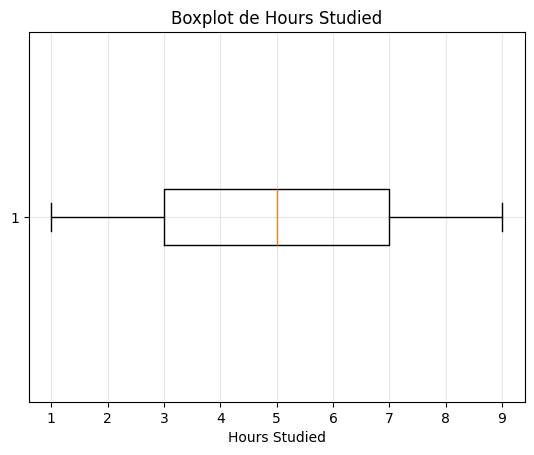

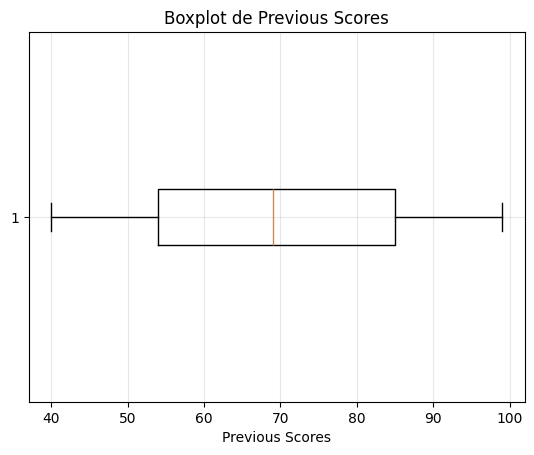

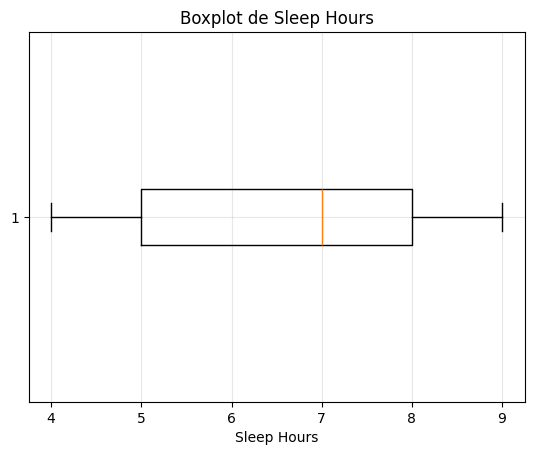

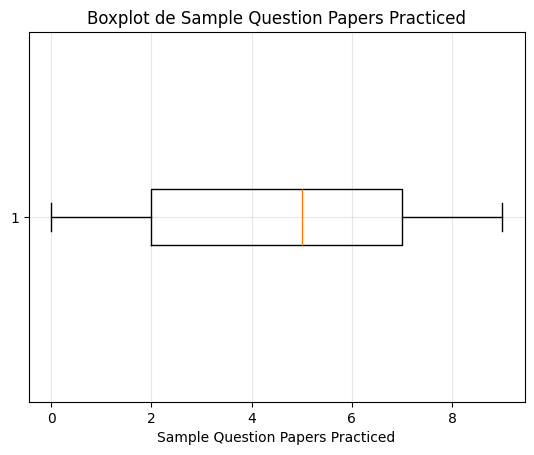

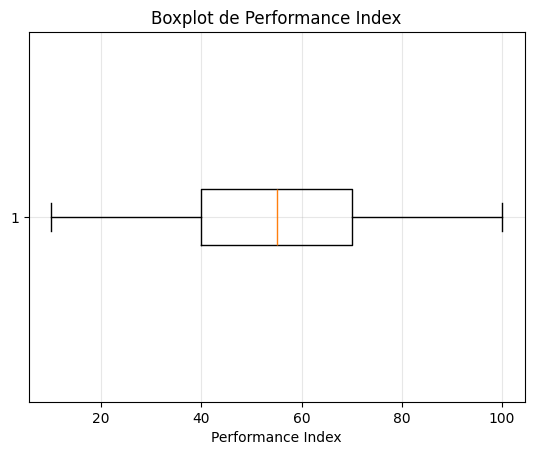

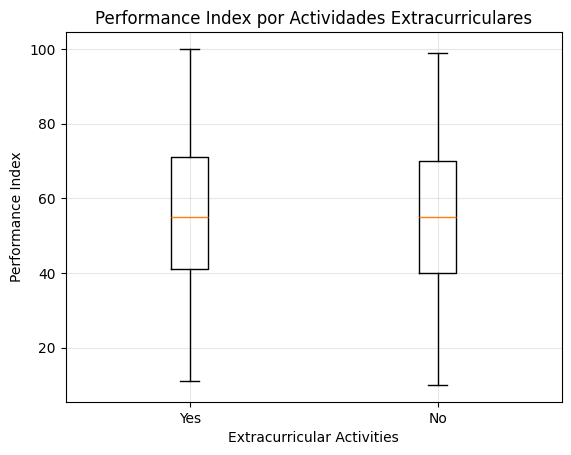

In [21]:
# 2. Boxplots
for col in num_vars:
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.grid(alpha=0.3)
    plt.show()


# Boxplot del Performance Index por categoría de actividades extracurriculares
categories = df["Extracurricular Activities"].unique()
data = [df[df["Extracurricular Activities"] == cat]["Performance Index"] for cat in categories]

plt.boxplot(data, tick_labels=categories)
plt.title("Performance Index por Actividades Extracurriculares")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Performance Index")
plt.grid(alpha=0.3)
plt.show()


## Scatter Plots contra el Performance Index

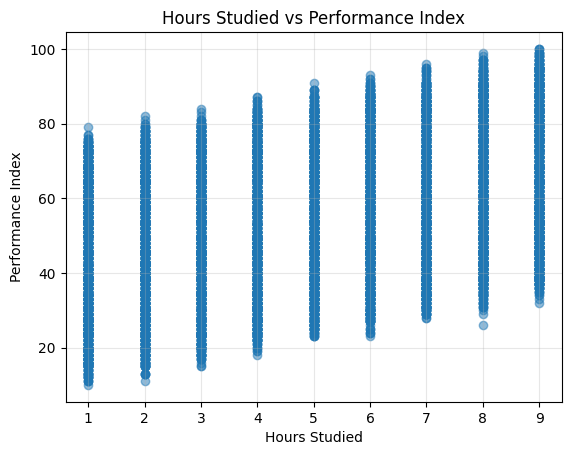

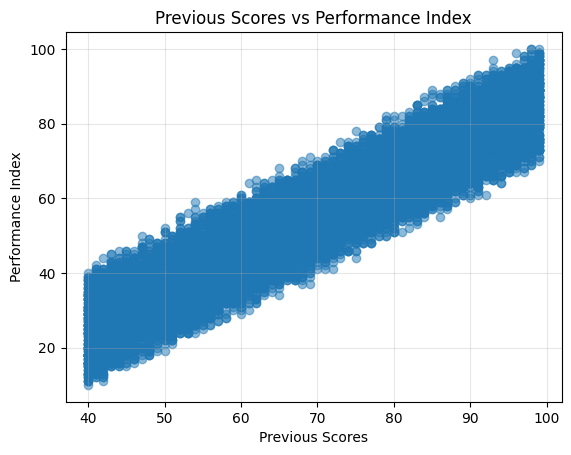

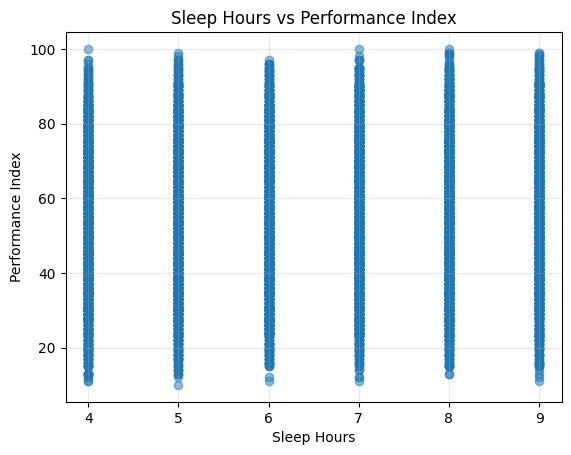

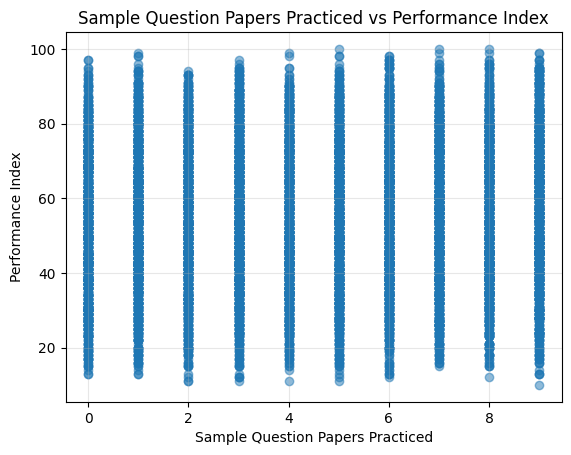

In [15]:
target = "Performance Index"
for col in num_vars:
    if col != target:
        plt.scatter(df[col], df[target], alpha=0.5)
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.grid(alpha=0.3)
        plt.show()

## Heatmap de correlacion

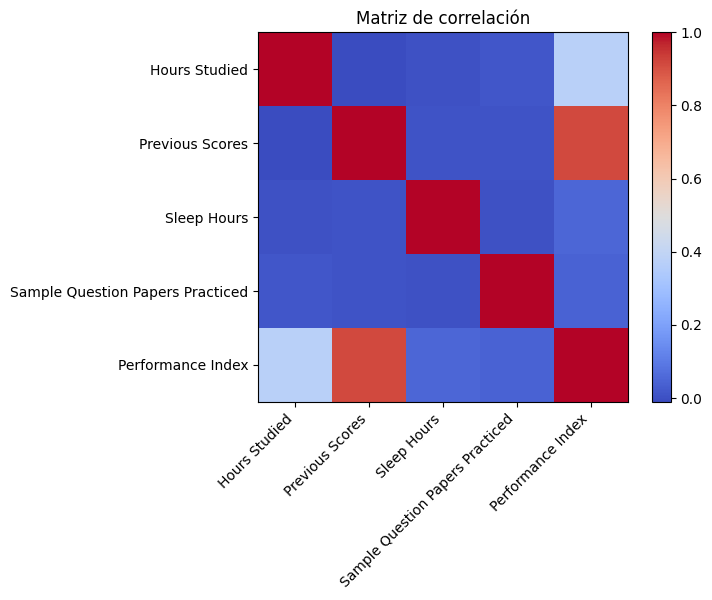

In [16]:
corr = df[num_vars].corr()

fig, ax = plt.subplots()
cax = ax.imshow(corr, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)

# Poner etiquetas en ejes
ax.set_xticks(range(len(corr)))
ax.set_yticks(range(len(corr)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.columns)

plt.title("Matriz de correlación")
plt.show()

## Grafico de barras para variable categorica

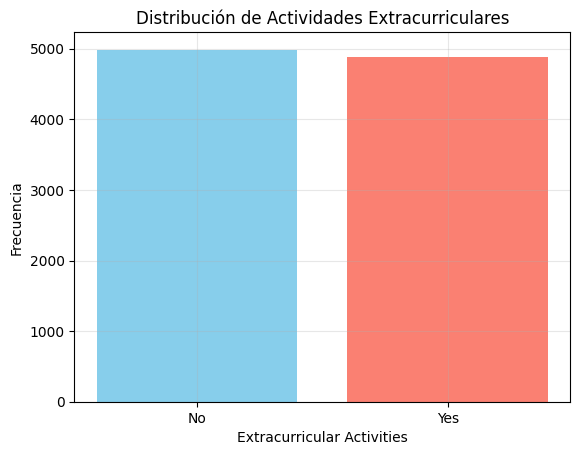

In [6]:
cat_counts = df["Extracurricular Activities"].value_counts()

plt.bar(cat_counts.index, cat_counts.values, color=['skyblue', 'salmon'])
plt.title("Distribución de Actividades Extracurriculares")
plt.xlabel("Extracurricular Activities")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()

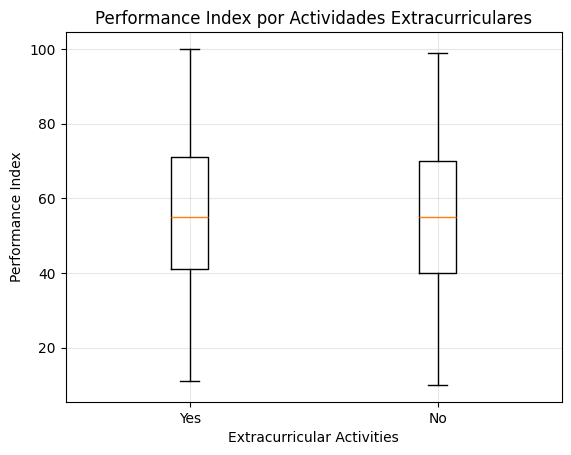

In [ ]:
categories = df["Extracurricular Activities"].unique()
data = [df[df["Extracurricular Activities"] == cat][target] for cat in categories]

plt.boxplot(data, tick_labels=categories)
plt.title(f"{target} por Actividades Extracurriculares")
plt.xlabel("Extracurricular Activities")
plt.ylabel(target)
plt.grid(alpha=0.3)
plt.show()

## Split de Dataset

In [ ]:
# Transformas los datos a numericos, no nos preocupa trabajar con una copia, ya que tenemos el dataset original
"""
df["Extracurricular Activities"] = (
    df["Extracurricular Activities"].map({'Yes' : 1, 'No' : 0}).astype('int64')
)
"""
df["Extracurricular Activities"]

# Definimos nuestros features 'X' y  target `y` = 'Performance Index'
FEATURE_COLS = [
    "Hours Studied",
    "Previous Scores",
    "Extracurricular Activities", 
    "Sleep Hours",
    "Sample Question Papers Practiced",
]

TARGET_COL = "Performance Index"

def define_x_y(df: pandas.DataFrame):
    """
    Separamos el DataFrame en X (features) y Y (Target) con el orden acordado
    """

    X = df[FEATURE_COLS].copy()
    Y = df[TARGET_COL].copy()

    return X, Y

X, Y = define_x_y(df)

# Creamos una lista de indices que vamos a permutar y hacer cortes
idx = df.index
idx

# Constante, se eligio aleatoriamente (puede ser fechada)
# Muestreo aleatorio
SEED = 42

perm = np.random.default_rng(SEED).permutation(idx)
perm
n = perm.shape[0]

val_n = int(n * 0.15) #Corte para validacion 
test_n = int(n * 0.15) #Corte para testing
train_n = n - val_n - test_n #Restante para training

train_idx = perm[:train_n]
val_idx   = perm[train_n:train_n + val_n]
test_idx  = perm[train_n + val_n:]

# Aplicamos a X y Y el mismo indicie para ambos
X_train, X_val, X_test = X.loc[train_idx], X.loc[val_idx], X.loc[test_idx]
y_train, y_val, y_test = Y.loc[train_idx], Y.loc[val_idx], Y.loc[test_idx]


10000


In [34]:
# Funcion para ajustar estadisticas de escalado en train
# Aplicar escalado 
# Añadimos la columna de bias

NUMERIC_COLS = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced",
]

def fit_standard_params(X_train: pandas.DataFrame, cols = NUMERIC_COLS):
    """
    Calcula la media y desviacion por columna usando solo X_train
    Retorna -> diccionario con params por columna
    """
    means = X_train[cols].mean(axis=0)
    stds = X_train[cols].std(axis=0, ddof=0)

    #Evitamos division por 0
    stds_replaced = stds.replace(0, 1.0)

    params = {
        "method" : "standard",
        "columns" : list(cols),
        "means" : means.to_dict(),
        "std" : stds_replaced.to_dict()
    }

    return params

def apply_standard_params(X: pandas.DataFrame, params : dict):
    """
    Aplica el escalado estandar con los parametros ya ajustados
    """

    cols = params["columns"]
    X_out = X.copy()
    for c in cols:
        mu = params["means"][c]
        sd = params["std"][c]
        X_out[c] = (X_out[c].astype(float) - mu) / sd
    return X_out

def add_bias_colums(X: pandas.DataFrame):
    X_out = X.copy()
    X_out.insert(0, "bias", 1.0)
    return X_out

# Aplicamos las funciones
scaler_params = fit_standard_params(X_train, NUMERIC_COLS)

#Aplicamos los parametros a cada split
X_train_s = apply_standard_params(X_train, scaler_params)
X_val_s = apply_standard_params(X_val, scaler_params)
X_tests_s = apply_standard_params(X_test, scaler_params)

# Añadimos la columna del bias
X_train_b = add_bias_colums(X_train_s)
X_val_b = add_bias_colums(X_val_s)
X_tests_b = add_bias_colums(X_tests_s)

In [ ]:
# Muestreo estratificado

# Vamos a reutilizar las funciones de escalado y bias que usamos anteriormente
# Y para elegir los features y el Target tambien se van a reutilizar variables y la funcion

# 1. Binear por cuartiles
def bin_performance_index(y: pandas.Series, n_bins: int = 5):
    bins = pandas.cut(y, n_bins, labels=False, duplicates='drop')
    return bins 

# 2. Split estratificado
def stratified_split(y_bins: pandas.Series, rng: np.random.Generator, val_ratio : float = 0.15, test_ratio : float = 0.15):
    """
    Parte los indices manteniendo proporciones por cada bin
    """
    train_idx, val_idx, test_idx = [], [], []

    valid = y_bins.dropna()
    unique_bins = np.sort(valid.unique())

    for b in unique_bins:
        idx_b = valid.index[valid == b].to_numpy()
        perm_b = rng.permutation(idx_b)
        n_b = len(perm_b)
        val_n_b = int(n_b * val_ratio)
        test_n_b = int(n_b * test_ratio)
        train_n_b = n_b - val_n_b - test_n_b

        train_idx.append(perm_b[:train_n_b])
        val_idx.append(perm_b[train_n_b: train_n_b+val_n_b])
        test_idx.append(perm_b[train_n_b + val_n_b:])

    train_idx = np.concatenate(train_idx) if train_idx else np.array([], dtype=object)
    val_idx   = np.concatenate(val_idx)   if val_idx   else np.array([], dtype=object)
    test_idx  = np.concatenate(test_idx)  if test_idx  else np.array([], dtype=object)

    return train_idx, val_idx, test_idx

def stratified_pipeline(df: pandas.DataFrame, n_bins = 5):
        rng = np.random.default_rng(SEED)

        # 1) X,y
        X, Y = define_x_y(df)

        # 2) Bins por cuantiles sobre y (para estratificar)
        y_bins = bin_performance_index(Y, n_bins=n_bins)

        # 3) Splits por estrato
        train_idx, val_idx, test_idx = stratified_split(y_bins, rng)

        X_train, X_val, X_test = X.loc[train_idx], X.loc[val_idx], X.loc[test_idx]
        y_train, y_val, y_test = Y.loc[train_idx], Y.loc[val_idx], Y.loc[test_idx]

        # 4) Escalado con estadísticas del TRAIN
        scaler_params = fit_standard_params(X_train, NUMERIC_COLS)
        X_train_s = apply_standard_params(X_train, scaler_params)
        X_val_s   = apply_standard_params(X_val,   scaler_params)
        X_test_s  = apply_standard_params(X_test,  scaler_params)

        X_train_s = add_bias_colums(X_train_s)
        X_val_s   = add_bias_colums(X_val_s)
        X_test_s  = add_bias_colums(X_test_s)

        info_bins = (
        pandas.DataFrame({"bin": y_bins})
          .assign(split=lambda s:
                  np.where(s.index.isin(train_idx), "train",
                  np.where(s.index.isin(val_idx),   "val",
                  np.where(s.index.isin(test_idx),  "test", "none"))))
          .groupby(["split", "bin"]).size().unstack(0).fillna(0).astype(int)
        )

        return (X_train_s, y_train), (X_val_s, y_val), (X_test_s, y_test), scaler_params, info_bins

(train, val, test, scaler_params, info_bins) = stratified_pipeline(df)
(X_train_stratified, y_train_stratified), (X_val_stratified, y_val_stratified), (X_test_stratified, y_test_stratified) = train, val, test

print(info_bins)

split  test  train  val
bin                    
0       135    636  135
1       400   1873  400
2       443   2068  443
3       395   1844  395
4       124    585  124


In [40]:
# Verificacion del proceso de spliting
def split_report(X, train_idx, val_idx, test_idx, train_ratio = 0.7, val_ratio = 0.15, test_ratio = 0.15):
    n = len(X)
    n_tr, n_va, n_te = len(train_idx), len(val_idx), len(test_idx)
    ratios = {
        "train" : (n_tr, n_tr / n),
        "val": (n_va, n_va / n),
        "test" : (n_te, n_te / n)
    }

    s_tr, s_va, s_te = set(train_idx), set(val_idx), set(test_idx)
    disjoint = s_tr.isdisjoint(s_va) and s_tr.isdisjoint(s_te) and s_va.isdisjoint(s_te)

    covered_all = (n_tr + n_va + n_te == n)
    return {
        "n_total": n,
        "ratios": ratios,
        "expected": {"train": train_ratio, "val": val_ratio, "test": test_ratio},
        "disjoint": disjoint,
        "covered_all": covered_all,
    }


sizes = split_report(X, train_idx, val_idx, test_idx)
print("= Split sizes =")
print("Total:", sizes["n_total"])
for part, (n, r) in sizes["ratios"].items():
    print(f"{part:>5}: {n}  ({r:.3f})  vs esperado {sizes['expected'][part]:.2f}")
print("Disjoint:", sizes["disjoint"], " Covered all:", sizes["covered_all"])

= Split sizes =
Total: 10000
train: 7000  (0.700)  vs esperado 0.70
  val: 1500  (0.150)  vs esperado 0.15
 test: 1500  (0.150)  vs esperado 0.15
Disjoint: True  Covered all: True


In [ ]:
# En ambos casos los X son los features y los Y son las target

# Sets del Split Random
X_train_b 
X_val_b 
X_tests_b 
y_train, y_val, y_test
# Set del split Estratificado
(X_train_stratified, y_train_stratified), (X_val_stratified, y_val_stratified), (X_test_stratified, y_test_stratified)